In [203]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Read Image and add a extra pixel border

In [204]:
image = cv2.imread('./perito.jpeg', 0)
biggerImage = np.zeros((image.shape[0]+2, image.shape[1]+2))

for i in range(1, image.shape[0]-1):
    for j in range(1, image.shape[1]-1):
        biggerImage[i][j] = image[i-1][j-1]

Test Filters

In [205]:
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

Calculate Target Size

In [206]:
def targetSize(N, kernel_N):
    pixels = 0

    for i in range(N):
        aux = i + kernel_N
        if aux <= N: pixels += 1
            
    return pixels

Convolve Function based on formula

$$F\circ I(x,y) = \sum_{j=-N}^N \sum_{i=-N}^N F(i,j) I(x+1, y+1)$$

In [207]:
def convolve(img, kernel):
    k = kernel.shape[0]
    xSize = targetSize(img.shape[0], k)
    ySize = targetSize(img.shape[1], k)

    convolved = np.zeros(shape=(xSize, ySize))
    
    for i in range(xSize):
        for j in range(ySize):
            mat = img[i:i+k, j:j+k]
            convolved[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved

In [208]:
sharpened = convolve(biggerImage, sharpen)
blured = convolve(biggerImage, blur)
outlined = convolve(biggerImage, outline)

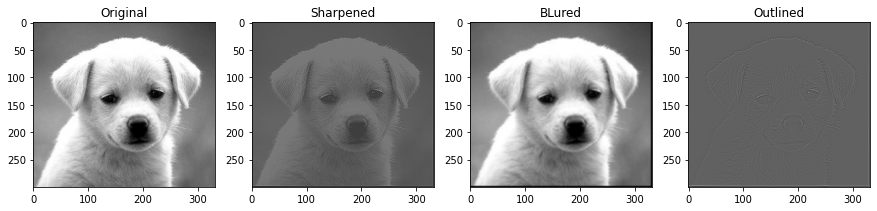

In [209]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.subplot(1,4,2)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened')
plt.subplot(1,4,3)
plt.imshow(blured, cmap='gray')
plt.title('BLured')
plt.subplot(1,4,4)
plt.title('Outlined')
plt.imshow(outlined, cmap='gray')
plt.show()